In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

btw, "wrt" stands for "with respect to"

#### network architecture
- 2 layers (1 hidden + 1 ouput)
- 1 neuron per layer (single weight/bias for each)
- parameter init with `np.random.randn()`

#### Objectives for part2.py
1. Implement ReLU activation function
2. Generate non-linear data
3. Define network architecture (# of layres, # of neurons, init weights)
4. Extend forward pass to handle multiple layers
5. Implement Backward passm
6. Update training loop
7. Visualization and Experiement with Hyperparameters

#### Objectives for part2 jupyter notebook visualizations
- **Data and Model Fit**: Show the non-linear data points and your model's predictions vs. what a linear model would predict
- **Loss Comparison**: Compare loss curves between your 2-layer network and a simple linear model
- **Hidden Layer Activations**: Visualize what the hidden layer learns (before and after ReLU)
- **Decision Boundary Evolution**: Show how the model's predictions change during training
- **Parameter Evolution**: Track how all 4 parameters (2 weights, 2 biases) evolve during training

## 1. Generate Sample Data

In [2]:
np.random.seed(42)  # For reproducibility

In [3]:
n_samples = 100
noise_level = 3

In [4]:
# Generate x values
X = np.random.uniform(0, 10, n_samples)

In [5]:
# Generate y values with some noise to mimic "real world" phenomenon
# Non-linear relationship: quadratic function
y = 0.5 * X**2 - 2 * X + 5 + np.random.normal(0, noise_level, n_samples)

In [6]:
# Split into training and testing sets (80% train, 20% test)
split_idx = int(0.8 * n_samples)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## 2. Initialize parameters

In [7]:
weight, weight2 = np.random.randn() * 0.5, np.random.randn() * 0.5 # coefficient/slope
bias, bias2 = 0.1, np.random.randn() * 0.1  # intercept

## 3. Define model functions

In [8]:
def ReLU(value: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return np.maximum(0, value)

In [9]:
def ReLU_derivative(value: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return (value > 0).astype(float)

In [10]:
def forward_pass(
    x: npt.NDArray[np.float64], w: float, b: float, w2: float, b2: float
) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    hidden_layer_raw_output = x * w + b
    hidden_layer_activated_output = ReLU(hidden_layer_raw_output)
    final_predictions = hidden_layer_activated_output * w2 + b2
    # return intermediate valeus for backprop
    return hidden_layer_raw_output, hidden_layer_activated_output, final_predictions

In [11]:
def loss_calculation(
    y_pred: npt.NDArray[np.float64], y_true: npt.NDArray[np.float64]
) -> np.floating:
    return np.mean((y_pred - y_true) ** 2)

In [12]:
def calculate_gradients(
    x: npt.NDArray[np.float64],
    y: npt.NDArray[np.float64],
    y_pred: npt.NDArray[np.float64],
    hidden_layer_raw: npt.NDArray[np.float64],
    hidden_layer_activated: npt.NDArray[np.float64],
    output_weight: float,
) -> dict[str, float]:
    # Calculate all gradients via backpropagation
    num_inputs = x.size

    # Output layer gradients (calculated direct from loss func)
    output_weight_gradient = (
        -2 / num_inputs * np.sum(hidden_layer_activated * (y - y_pred))
    )
    output_bias_gradient = -2 / num_inputs * np.sum(y - y_pred)

    # Hidden layer gradients (using chain rule)
    loss_gradient_wrt_predictions = -2 * (y - y_pred) / num_inputs
    hidden_activation_gradient = ReLU_derivative(hidden_layer_raw)

    loss_gradient_wrt_hidden_activated = loss_gradient_wrt_predictions * output_weight
    loss_gradient_wrt_hidden_raw = (
        loss_gradient_wrt_hidden_activated * hidden_activation_gradient
    )

    hidden_weight_gradient = np.sum(loss_gradient_wrt_hidden_raw * x)
    hidden_bias_gradient = np.sum(loss_gradient_wrt_hidden_raw)

    return {
        "hidden_weight": hidden_weight_gradient,
        "hidden_bias": hidden_bias_gradient,
        "output_weight": output_weight_gradient,
        "output_bias": output_bias_gradient,
    }

In [13]:
def update_parameters(
    hidden_weight: float,
    hidden_bias: float,
    output_weight: float,
    output_bias: float,
    gradients: dict[str, float],
    learning_rate: float,
) -> tuple[float, float, float, float]:
    """Update all parameters using calculated gradients"""
    updated_hidden_weight = hidden_weight - learning_rate * gradients["hidden_weight"]
    updated_hidden_bias = hidden_bias - learning_rate * gradients["hidden_bias"]
    updated_output_weight = output_weight - learning_rate * gradients["output_weight"]
    updated_output_bias = output_bias - learning_rate * gradients["output_bias"]

    return (
        updated_hidden_weight,
        updated_hidden_bias,
        updated_output_weight,
        updated_output_bias,
    )

## Training Loop

In [14]:
# Hyperparameters
learning_rate = 0.01
iterations = 1000

In [15]:
loss_history = []

In [24]:
for i in range(iterations):
    hidden_layer_raw, hidden_layer_activated, y_pred = forward_pass(
        X_train, weight, bias, weight2, bias2
    )
    loss = loss_calculation(y_pred, y_train)
    loss_history.append(loss)

    gradients = calculate_gradients(
        X_train, y_train, y_pred, hidden_layer_raw, hidden_layer_activated, weight2
    )

    weight, bias, weight2, bias2 = update_parameters(
        weight, bias, weight2, bias2, gradients, learning_rate
    )

    if (i + 1) % 100 == 0:
        print(
            f"Iteration {i + 1}/{iterations}, Loss: {loss:.4f}, Weight: {weight:.4f}, Bias: {bias:.4f}"
        )

Iteration 100/1000, Loss: 19.5542, Weight: 2.5775, Bias: -13.2811
Iteration 200/1000, Loss: 19.2833, Weight: 2.6454, Bias: -13.7653
Iteration 300/1000, Loss: 18.9432, Weight: 2.7106, Bias: -14.2026
Iteration 400/1000, Loss: 18.5546, Weight: 2.7647, Bias: -14.6079
Iteration 500/1000, Loss: 18.3270, Weight: 2.8191, Bias: -14.9782
Iteration 600/1000, Loss: 18.1231, Weight: 2.8634, Bias: -15.3210
Iteration 700/1000, Loss: 17.9149, Weight: 2.9109, Bias: -15.6528
Iteration 800/1000, Loss: 17.7376, Weight: 2.9557, Bias: -15.9603
Iteration 900/1000, Loss: 17.5819, Weight: 2.9976, Bias: -16.2456
Iteration 1000/1000, Loss: 16.6535, Weight: 3.0475, Bias: -16.5102


In [17]:
print(f"Final parameters: Weight = {weight:.4f}, Bias = {bias:.4f}")
print(f"Final output layer: Weight2 = {weight2:.4f}, Bias2 = {bias2:.4f}")

Final parameters: Weight = 2.5044, Bias = -12.7505
Final output layer: Weight2 = 1.2213, Bias2 = 4.6483


## Visualization

### Data Preparation

First, let's prepare our data for visualization and calculate comparison models.

In [18]:
# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# Generate comparison data
x_line = np.linspace(0, 10, 200)
# Your neural network predictions
hidden_raw = x_line * weight + bias
hidden_activated = np.maximum(0, hidden_raw)
nn_predictions = hidden_activated * weight2 + bias2

# Simple linear model for comparison
linear_slope = np.sum((X_train - np.mean(X_train)) * (y_train - np.mean(y_train))) / np.sum((X_train - np.mean(X_train))**2)
linear_intercept = np.mean(y_train) - linear_slope * np.mean(X_train)
linear_predictions = linear_slope * x_line + linear_intercept

# True function (quadratic)
true_predictions = 0.5 * x_line**2 - 2 * x_line + 5

# Get model predictions for actual data points
train_predictions = []
test_predictions = []

for x_val in X_train:
    h_raw = x_val * weight + bias
    h_act = max(0, h_raw)
    pred = h_act * weight2 + bias2
    train_predictions.append(pred)

for x_val in X_test:
    h_raw = x_val * weight + bias
    h_act = max(0, h_raw)
    pred = h_act * weight2 + bias2
    test_predictions.append(pred)

train_predictions = np.array(train_predictions)
test_predictions = np.array(test_predictions)

print("Data preparation complete!")

Data preparation complete!


### 1. Model Predictions Comparison

This visualization shows how our neural network compares to other approaches:

- **🔵 Training/Test Data**: The actual data points with quadratic relationship
- **🔴 Neural Network**: Our 2-layer network with ReLU activation
- **🟠 Linear Model**: Simple linear regression (what Part 1 would achieve)
- **⚫ True Function**: The actual quadratic relationship `y = 0.5x² - 2x + 5`

**What to look for:**
- The neural network should follow the curved pattern much better than the linear model
- Linear model can only draw a straight line through the curved data
- Neural network uses ReLU to create piecewise linear approximations of the curve

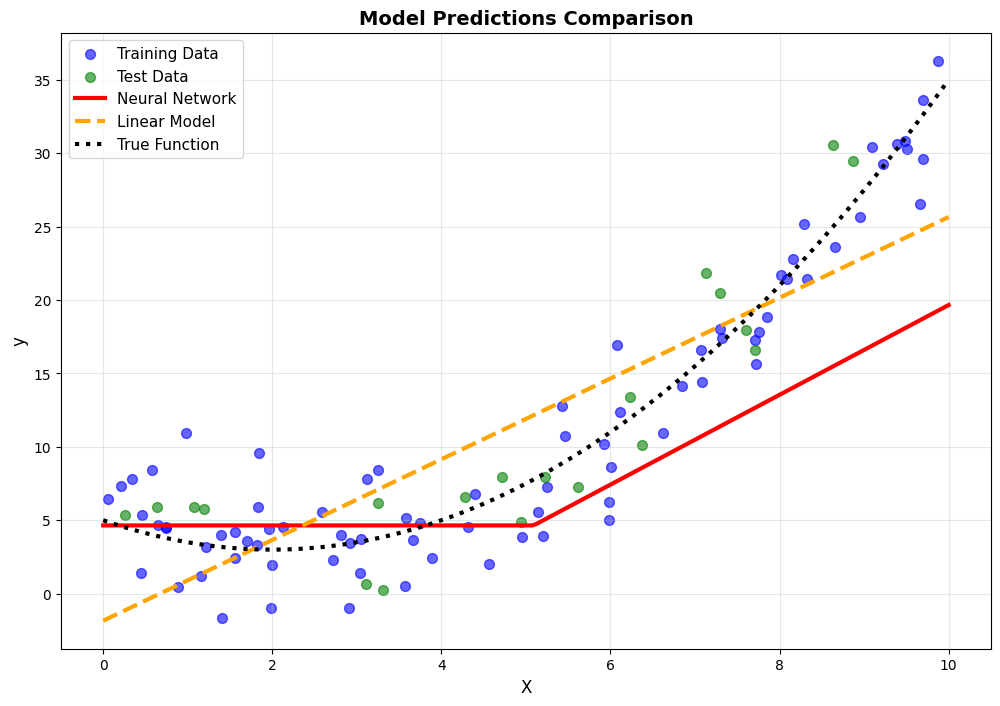

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data', s=50)
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Test Data', s=50)
plt.plot(x_line, nn_predictions, 'r-', linewidth=3, label='Neural Network')
plt.plot(x_line, linear_predictions, 'orange', linestyle='--', linewidth=3, label='Linear Model')
plt.plot(x_line, true_predictions, 'black', linestyle=':', linewidth=3, label='True Function')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Model Predictions Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

#### Why we're getting a straight line (with one kink) instead of a smooth curve
Our network has only 1 neuron in the hidden layer, which can only create 1 breakpoint. Here's what's happening:

- hidden_output = max(0, 2.50 * x - 12.75)
- This creates a kink at x = 12.75/2.50 ≈ 5.1
- Before x=5.1: output = bias2 (flat)
- After x=5.1: output = linear function (straight line)

#### How to Get a Curved Approximation
To approximate a smooth quadratic curve, we need multiple neurons in the hidden layer. Each neuron creates one kink, so:

- 1 neuron = 1 kink (what we have now)
- 3-5 neurons = 3-5 kinks (good curve approximation)
- 10+ neurons = very smooth curve

### 2. Training Loss Evolution

This plot shows how our model learned over time during the 1000 iterations.

**What this tells us:**
- **Rapid early improvement**: Loss should drop quickly in the first 100-200 iterations
- **Convergence**: Loss should level off, indicating the model has found a good solution
- **Learning rate effectiveness**: A smooth curve indicates our learning rate (0.01) was appropriate
- **No overfitting signs**: Loss should decrease steadily without erratic jumps

If we see oscillations or divergence, it usually means the learning rate is too high.

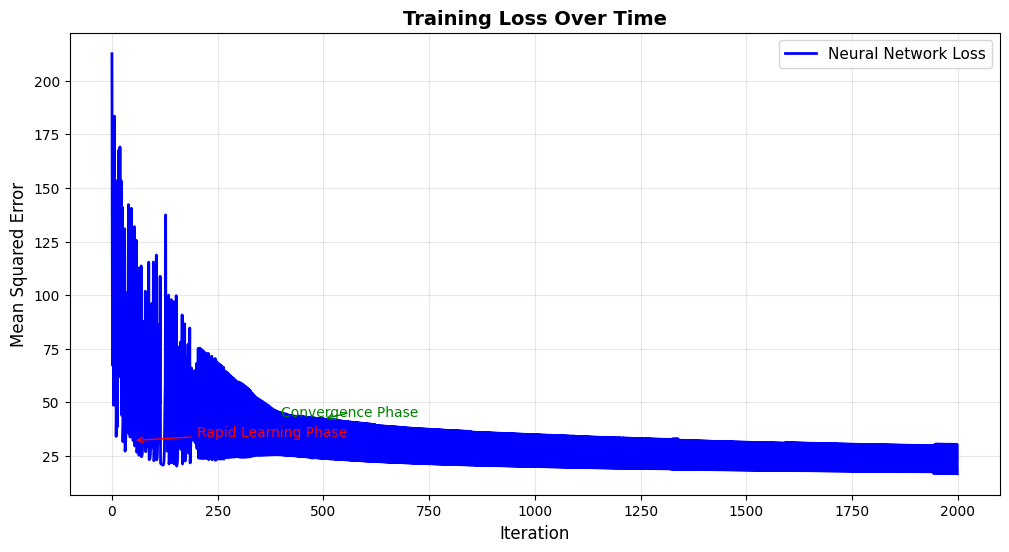

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, 'b-', linewidth=2, label='Neural Network Loss')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Find where convergence actually starts (where rate of change slows down)
loss_changes = np.diff(loss_history)
convergence_point = 500

plt.annotate('Rapid Learning Phase', 
             xy=(50, loss_history[50]), xytext=(200, loss_history[50] + 2),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.annotate('Convergence Phase', 
             xy=(convergence_point, loss_history[convergence_point]), 
             xytext=(400, loss_history[convergence_point] + 1),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10, color='green')

plt.show()

### 3. Hidden Layer Transformation Analysis

This visualization shows what happens inside our neural network's hidden layer:

- **🟣 Before ReLU (raw)**: The linear transformation `X * weight + bias`
- **🔴 After ReLU (activated)**: The result after applying `max(0, x)`

**Key insights:**
- **ReLU effect**: All negative values become zero, creating a "bent" line
- **Non-linearity creation**: This bending is what allows our network to fit curved data
- **Feature learning**: The hidden layer learns to create useful features for the output layer

The ReLU activation is what transforms our network from a simple linear model into something that can learn complex patterns!

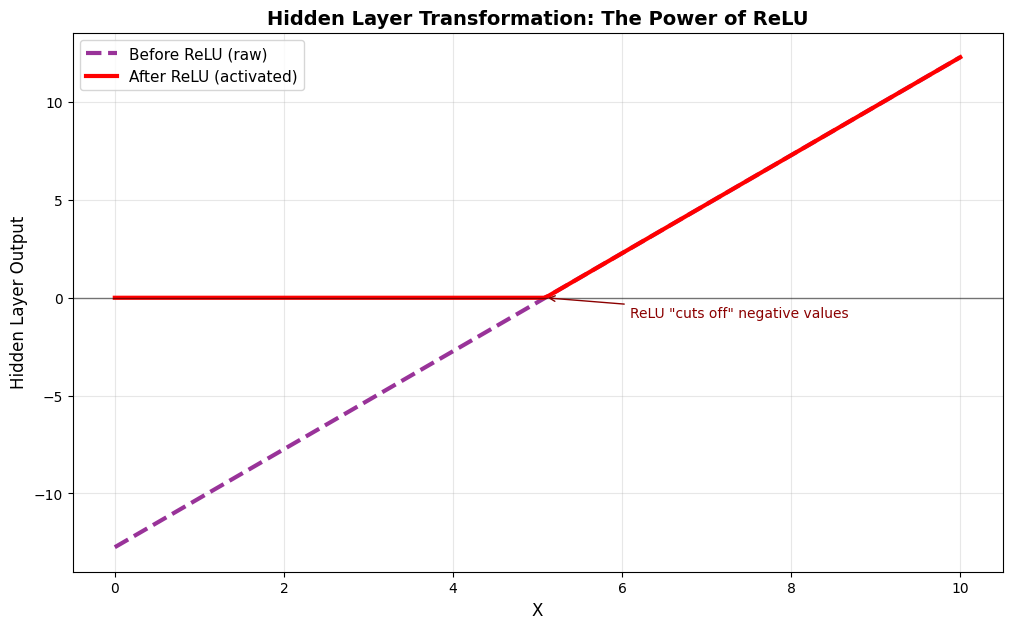

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(x_line, hidden_raw, 'purple', linestyle='--', linewidth=3, label='Before ReLU (raw)', alpha=0.8)
plt.plot(x_line, hidden_activated, 'red', linewidth=3, label='After ReLU (activated)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
plt.xlabel('X', fontsize=12)
plt.ylabel('Hidden Layer Output', fontsize=12)
plt.title('Hidden Layer Transformation: The Power of ReLU', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Find a better annotation point
kink_point = -bias / weight if weight != 0 else 5
if kink_point > 0 and kink_point < 10:
    plt.annotate('ReLU "cuts off" negative values', 
                 xy=(kink_point, 0), xytext=(kink_point + 1, -1),
                 arrowprops=dict(arrowstyle='->', color='darkred'),
                 fontsize=10, color='darkred')

plt.show()

### "Why am I seeing Flat Lines?"
If we see our neural network plotted line as being horizontal it means there's a prolem without our weight & bias initialization. When our model was initialized with :

```
weight, weight2 = np.random.randn(), np.random.randn()
bias, bias2 = np.random.randn(), np.random.randn()
```

This created these problems:
- **bias was too negative**: the `np.random.randn()` func can generate values like -2, -3, and -4. ReLU kills all negative values.
- **weight scale was wrong**: the same random func gives values with standard deviation = 1. This can be too large or too small depending on our data scale. Our X values range from 0-10, so even small weights get amplified.

#### It's a classic problem in deep learning

- **Too small weights**: Gradients vanish, slow learning
- **Too large weights**: Gradients explode, unstable learning
- **Wrong bias**: Neurons die or saturate
- **Poor initialization**: Network never starts learning

This is why modern deep learning uses sophisticated initialization schemes like:

- Xavier/Glorot: For sigmoid/tanh activations
- He initialization: For ReLU activations (what you should use!)
- LSUV: Layer-wise sequential uniform variance

#### How do we fix this?

When I added logs in the training loop, it showed that we had a classic case of **"dying ReLU"** - our network was completely stuck.

The logs showed:
- hidden activations were always zero
- parameters never changed despite iterations increasing
- loss never improved
- network outputs constant value

Some research showed that the solution was better initialization. For the purpose of this part, I just slightly tweaked the weights & biases. In part 3,  I'll implement a proper multi-neuron hidden layer which will give us our smooth prediction curve.

### 4. Prediction Accuracy Analysis

This scatter plot compares actual values vs predicted values for both training and test data.

**How to interpret:**
- **Perfect predictions** would lie exactly on the red diagonal line
- **Points above the line**: Model under-predicted (actual > predicted)
- **Points below the line**: Model over-predicted (actual < predicted)
- **Tight clustering around line**: Good model performance
- **Similar patterns for train/test**: Model generalizes well (no overfitting)

The closer the points are to the diagonal line, the better our model is performing!

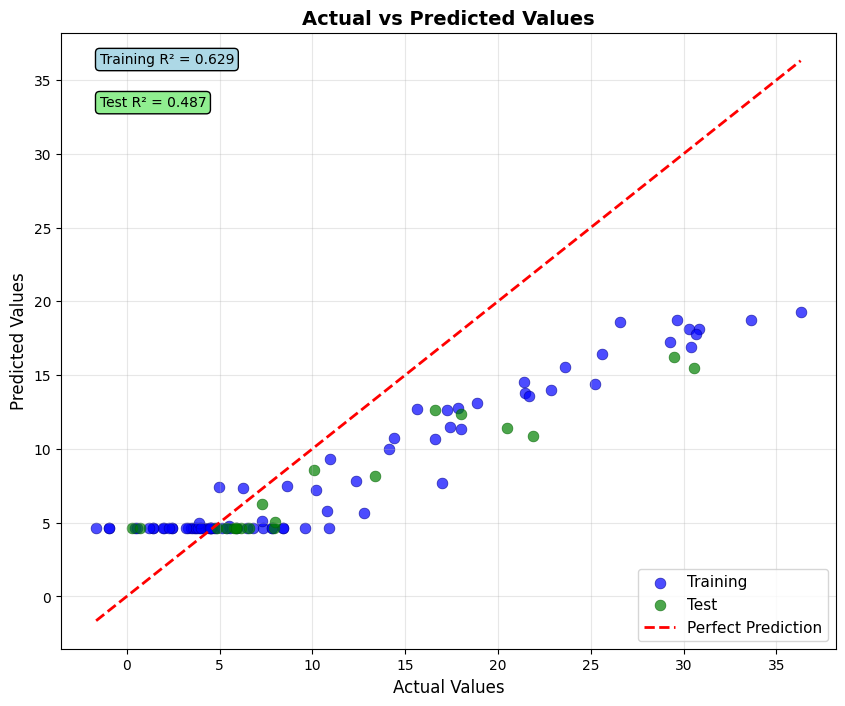

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(y_train, train_predictions, alpha=0.7, color='blue', label='Training', s=60, edgecolors='darkblue', linewidth=0.5)
plt.scatter(y_test, test_predictions, alpha=0.7, color='green', label='Test', s=60, edgecolors='darkgreen', linewidth=0.5)

# Perfect prediction line
min_val = min(np.min(y_train), np.min(y_test), np.min(train_predictions), np.min(test_predictions))
max_val = max(np.max(y_train), np.max(y_test), np.max(train_predictions), np.max(test_predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add R² values as text
train_ss_res = np.sum((y_train - train_predictions)**2)
train_ss_tot = np.sum((y_train - np.mean(y_train))**2)
train_r2 = 1 - (train_ss_res / train_ss_tot)

test_ss_res = np.sum((y_test - test_predictions)**2)
test_ss_tot = np.sum((y_test - np.mean(y_test))**2)
test_r2 = 1 - (test_ss_res / test_ss_tot)

plt.text(0.05, 0.95, f'Training R² = {train_r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightblue'), fontsize=10)
plt.text(0.05, 0.88, f'Test R² = {test_r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightgreen'), fontsize=10)

plt.show()

### 5. Model Performance Statistics

Let's quantify how well our neural network performed compared to what we could achieve with simpler models.

**Metrics explained:**
- **MSE (Mean Squared Error)**: Average of squared prediction errors (lower is better)
- **RMSE (Root Mean Squared Error)**: Square root of MSE, in same units as our data
- **R² (R-squared)**: Proportion of variance explained (1.0 = perfect, 0.0 = no better than average)

**What good performance looks like:**
- Training and test performance should be similar (indicates no overfitting)
- R² should be significantly higher than a linear model would achieve
- RMSE should be reasonably small compared to the range of your data

In [23]:
# Calculate comprehensive statistics
print("=" * 50)
print("NEURAL NETWORK PERFORMANCE ANALYSIS")
print("=" * 50)

# Basic metrics
train_mse = np.mean((y_train - train_predictions)**2)
test_mse = np.mean((y_test - test_predictions)**2)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"\n📊 PREDICTION ACCURACY:")
print(f"Training MSE:  {train_mse:.4f}")
print(f"Test MSE:      {test_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE:     {test_rmse:.4f}")

# R-squared
print(f"\n📈 VARIANCE EXPLAINED (R²):")
print(f"Training R²: {train_r2:.4f} ({train_r2*100:.1f}% of variance explained)")
print(f"Test R²:     {test_r2:.4f} ({test_r2*100:.1f}% of variance explained)")

# Compare to linear model
linear_train_pred = linear_slope * X_train + linear_intercept
linear_test_pred = linear_slope * X_test + linear_intercept
linear_train_mse = np.mean((y_train - linear_train_pred)**2)
linear_test_mse = np.mean((y_test - linear_test_pred)**2)

print(f"\n🔄 COMPARISON TO LINEAR MODEL:")
print(f"Linear model training MSE: {linear_train_mse:.4f}")
print(f"Linear model test MSE:     {linear_test_mse:.4f}")
print(f"Improvement over linear:   {((linear_test_mse - test_mse) / linear_test_mse * 100):.1f}%")

# Generalization check
generalization_gap = abs(test_mse - train_mse) / train_mse * 100
print(f"\n🎯 GENERALIZATION:")
print(f"Train-Test gap: {generalization_gap:.1f}%", end="")
if generalization_gap < 10:
    print(" ✅ (Good generalization)")
elif generalization_gap < 25:
    print(" ⚠️ (Moderate generalization)")
else:
    print(" ❌ (Poor generalization - possible overfitting)")

print(f"\n🔧 FINAL PARAMETERS:")
print(f"Hidden Layer - Weight: {weight:.4f}, Bias: {bias:.4f}")
print(f"Output Layer - Weight: {weight2:.4f}, Bias: {bias2:.4f}")

NEURAL NETWORK PERFORMANCE ANALYSIS

📊 PREDICTION ACCURACY:
Training MSE:  34.8942
Test MSE:      37.5875
Training RMSE: 5.9071
Test RMSE:     6.1309

📈 VARIANCE EXPLAINED (R²):
Training R²: 0.6290 (62.9% of variance explained)
Test R²:     0.4867 (48.7% of variance explained)

🔄 COMPARISON TO LINEAR MODEL:
Linear model training MSE: 24.2783
Linear model test MSE:     26.1944
Improvement over linear:   -43.5%

🎯 GENERALIZATION:
Train-Test gap: 7.7% ✅ (Good generalization)

🔧 FINAL PARAMETERS:
Hidden Layer - Weight: 2.5044, Bias: -12.7505
Output Layer - Weight: 1.2213, Bias: 4.6483
